In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [5]:
df.rename(index=str, columns={'Annual Income (k$)': 'Income', 'Spending Score (1-100)': 'Score'}, inplace=True)
df.head()

,CustomerID,Gender,Age,Income,Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


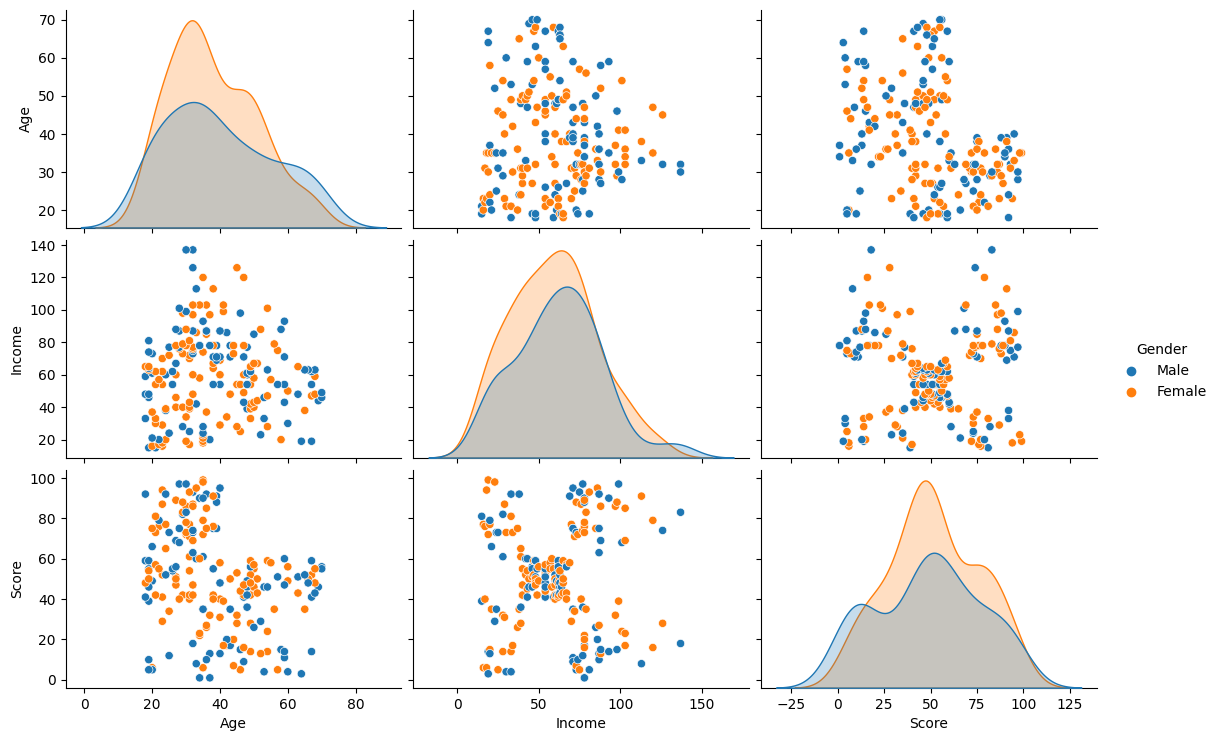

In [6]:
X = df.drop(['CustomerID', 'Gender'], axis=1)
sns.pairplot(df.drop(['CustomerID'], axis=1), hue='Gender', aspect=1.5)
plt.show()

In [23]:
X.head()

,Age,Income,Score,Labels
0,19,15,39,4
1,21,15,81,3
2,20,16,6,4
3,23,16,77,3
4,31,17,40,4


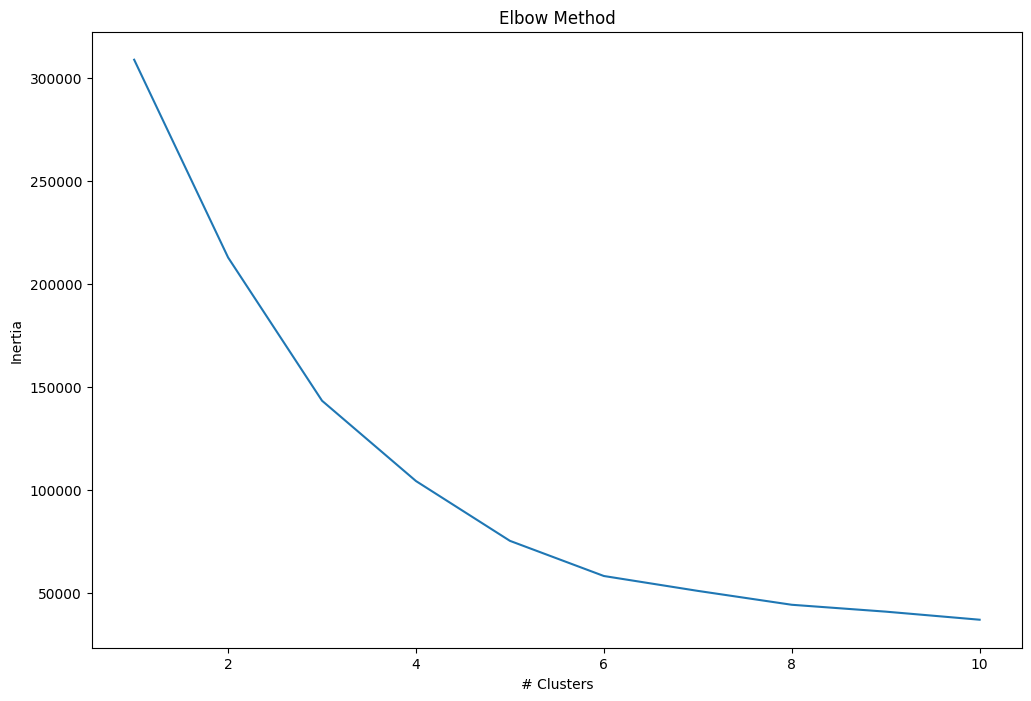

In [7]:
from sklearn.cluster import KMeans

clusters = []

for i in range(1, 11):
    km = KMeans(n_clusters=i).fit(X)
    clusters.append(km.inertia_)

fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(x = list(range(1, 11)), y=clusters, ax=ax)
ax.set_title('Elbow Method')
ax.set_xlabel('# Clusters')
ax.set_ylabel('Inertia')

plt.show()

0      1
1      1
2      1
3      1
4      1
      ..
195    2
196    0
197    2
198    0
199    2
Name: Labels, Length: 200, dtype: int32
0       15
1       15
2       16
3       16
4       17
      ... 
195    120
196    126
197    126
198    137
199    137
Name: Income, Length: 200, dtype: int64
0      39
1      81
2       6
3      77
4      40
       ..
195    79
196    28
197    74
198    18
199    83
Name: Score, Length: 200, dtype: int64


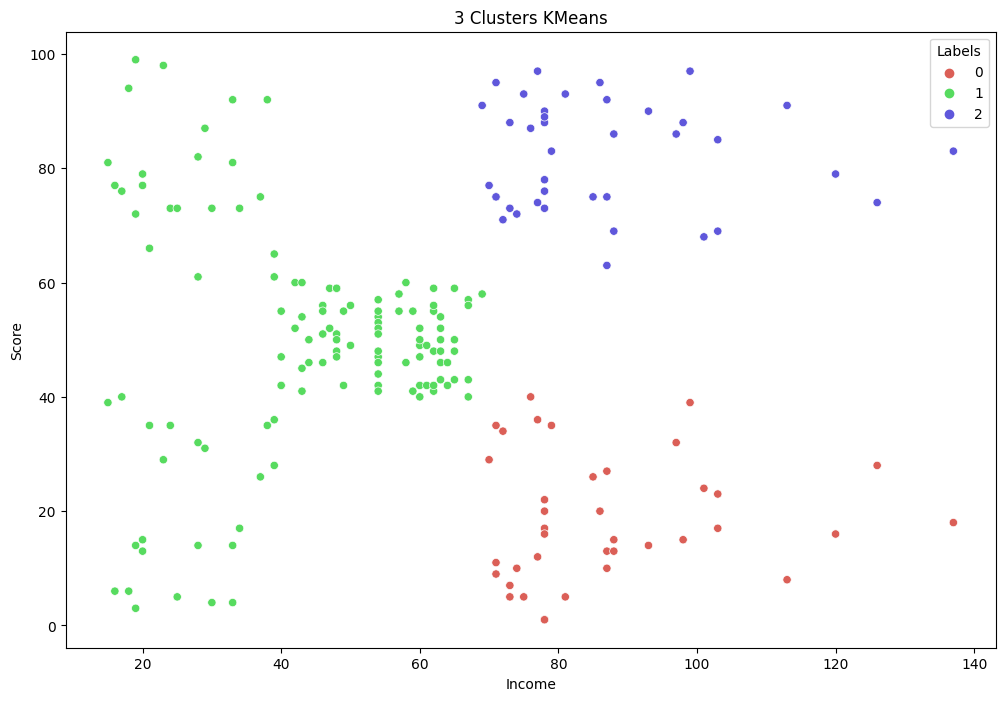

In [11]:
# n_clusters = 3
km3 = KMeans(n_clusters=3).fit(X)

X['Labels'] = km3.labels_

plt.figure(figsize=(12, 8))
sns.scatterplot(x=X['Income'], y=X['Score'], hue=X['Labels'], 
                palette=sns.color_palette('hls', 3))
plt.title('3 Clusters KMeans')
plt.show()

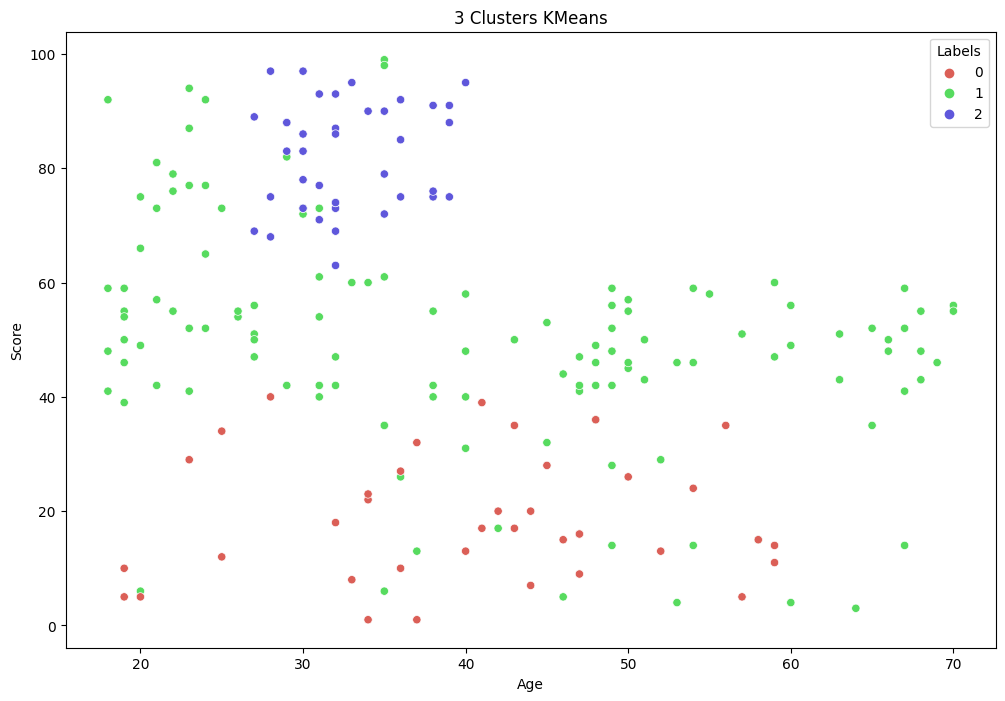

In [12]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x=X['Age'], y=X['Score'], hue=X['Labels'], 
                palette=sns.color_palette('hls', 3))
plt.title('3 Clusters KMeans')
plt.show()

In [16]:
np.mean(X[X['Labels'] == 0].Age)

40.39473684210526

In [17]:
np.mean(X[X['Labels'] == 1].Age)

40.32520325203252

In [18]:
np.mean(X[X['Labels'] == 2].Age)

32.69230769230769

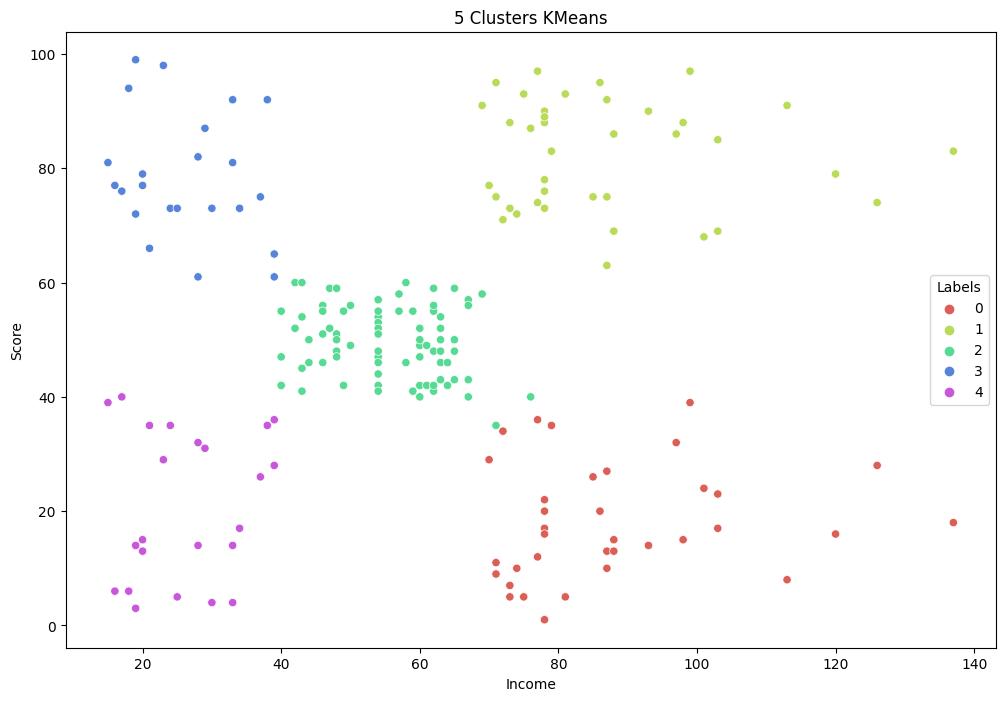

In [20]:
# n_clusters = 5
km5 = KMeans(n_clusters=5).fit(X)

X['Labels'] = km5.labels_

plt.figure(figsize=(12, 8))
sns.scatterplot(x=X['Income'], y=X['Score'], hue=X['Labels'], 
                palette=sns.color_palette('hls', 5))
plt.title('5 Clusters KMeans')
plt.show()

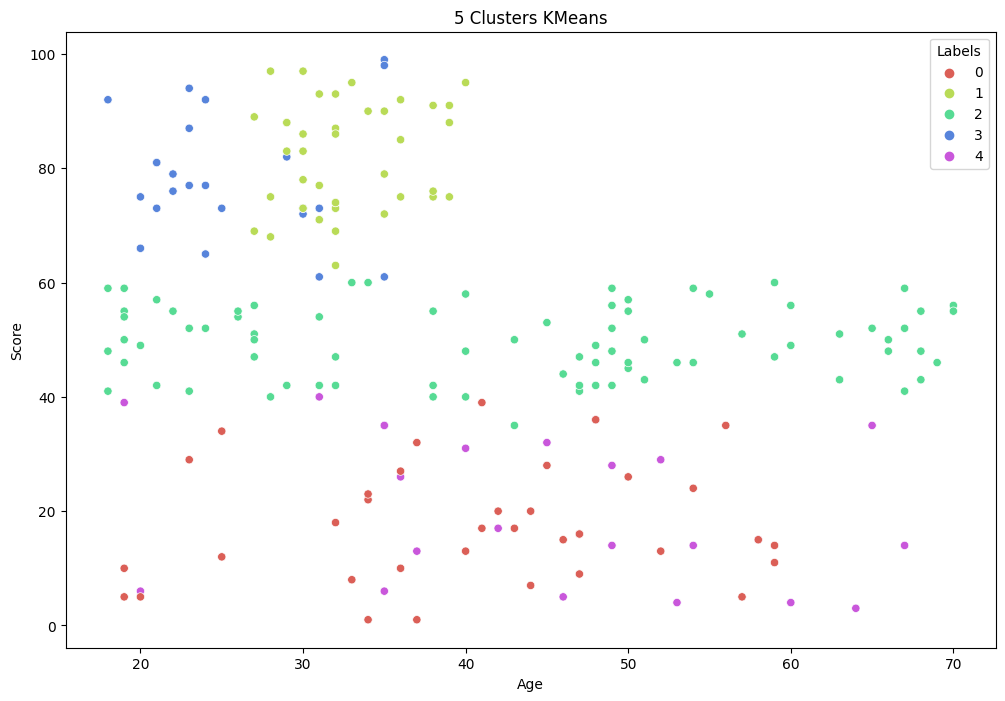

In [21]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x=X['Age'], y=X['Score'], hue=X['Labels'], 
                palette=sns.color_palette('hls', 5))
plt.title('5 Clusters KMeans')
plt.show()

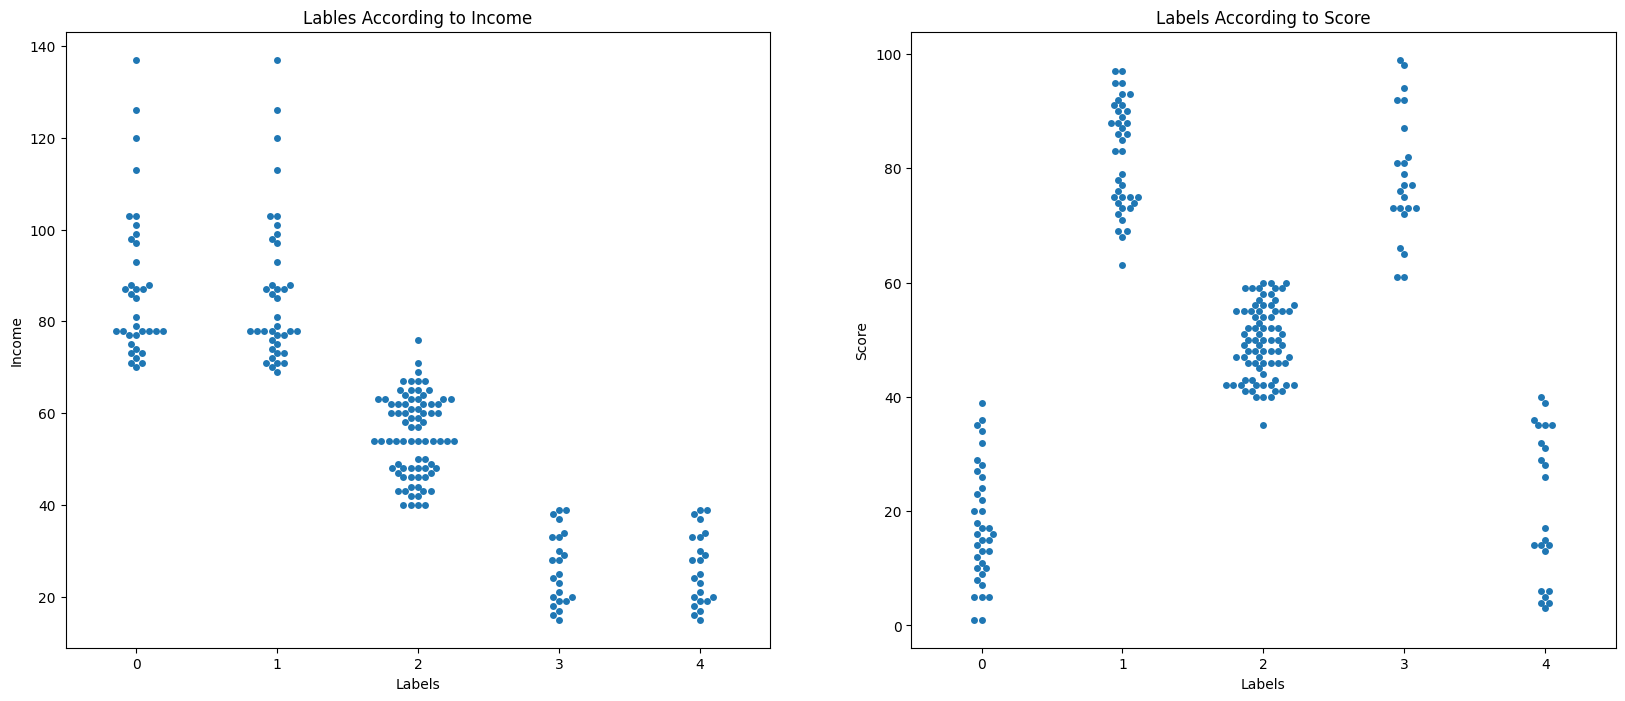

In [22]:
fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(121)
sns.swarmplot(x='Labels', y = 'Income', data=X, ax=ax)
ax.set_title('Lables According to Income')

ax = fig.add_subplot(122)
sns.swarmplot(x='Labels', y='Score', data=X, ax=ax)
ax.set_title('Labels According to Score')

plt.show()

In [33]:
X['Labels'].replace(0, 'Cluster 0').unique()

array([4, 3, 2, 1, 'Cluster 0'], dtype=object)

In [34]:
X['Labels'].unique()

array([4, 3, 2, 1, 0], dtype=int32)

In [31]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Age     200 non-null    int64
 1   Income  200 non-null    int64
 2   Score   200 non-null    int64
 3   Labels  200 non-null    int32
dtypes: int32(1), int64(3)
memory usage: 15.1+ KB


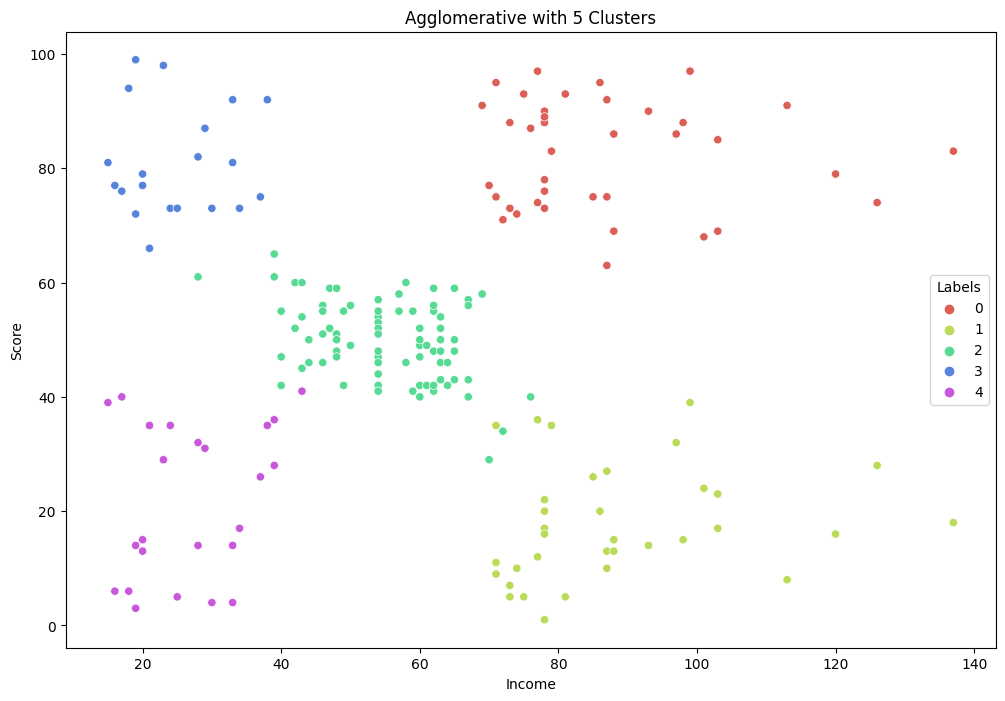

In [39]:
from sklearn.cluster import AgglomerativeClustering

agglom = AgglomerativeClustering(n_clusters=5, linkage='average').fit(X)

X['Labels'] = agglom.labels_
plt.figure(figsize=(12, 8))
sns.scatterplot(x=X['Income'], y=X['Score'], hue=X['Labels'], 
                palette=sns.color_palette('hls', 5))

plt.title('Agglomerative with 5 Clusters')
plt.show()

In [40]:
from scipy.cluster import hierarchy
from scipy.spatial import distance_matrix

dist = distance_matrix(X, X)
print(dist)

[[  0.          42.05948169  33.03028913 ... 117.17934972 124.51104369
  130.21904623]
 [ 42.05948169   0.          75.01999733 ... 111.80339887 137.76066202
  122.38463956]
 [ 33.03028913  75.01999733   0.         ... 129.93844697 122.22111111
  143.82628411]
 ...
 [117.17934972 111.80339887 129.93844697 ...   0.          57.07889277
   14.35270009]
 [124.51104369 137.76066202 122.22111111 ...  57.07889277   0.
   65.03845017]
 [130.21904623 122.38463956 143.82628411 ...  14.35270009  65.03845017
    0.        ]]


In [45]:
Z = hierarchy.linkage(dist, 'complete')

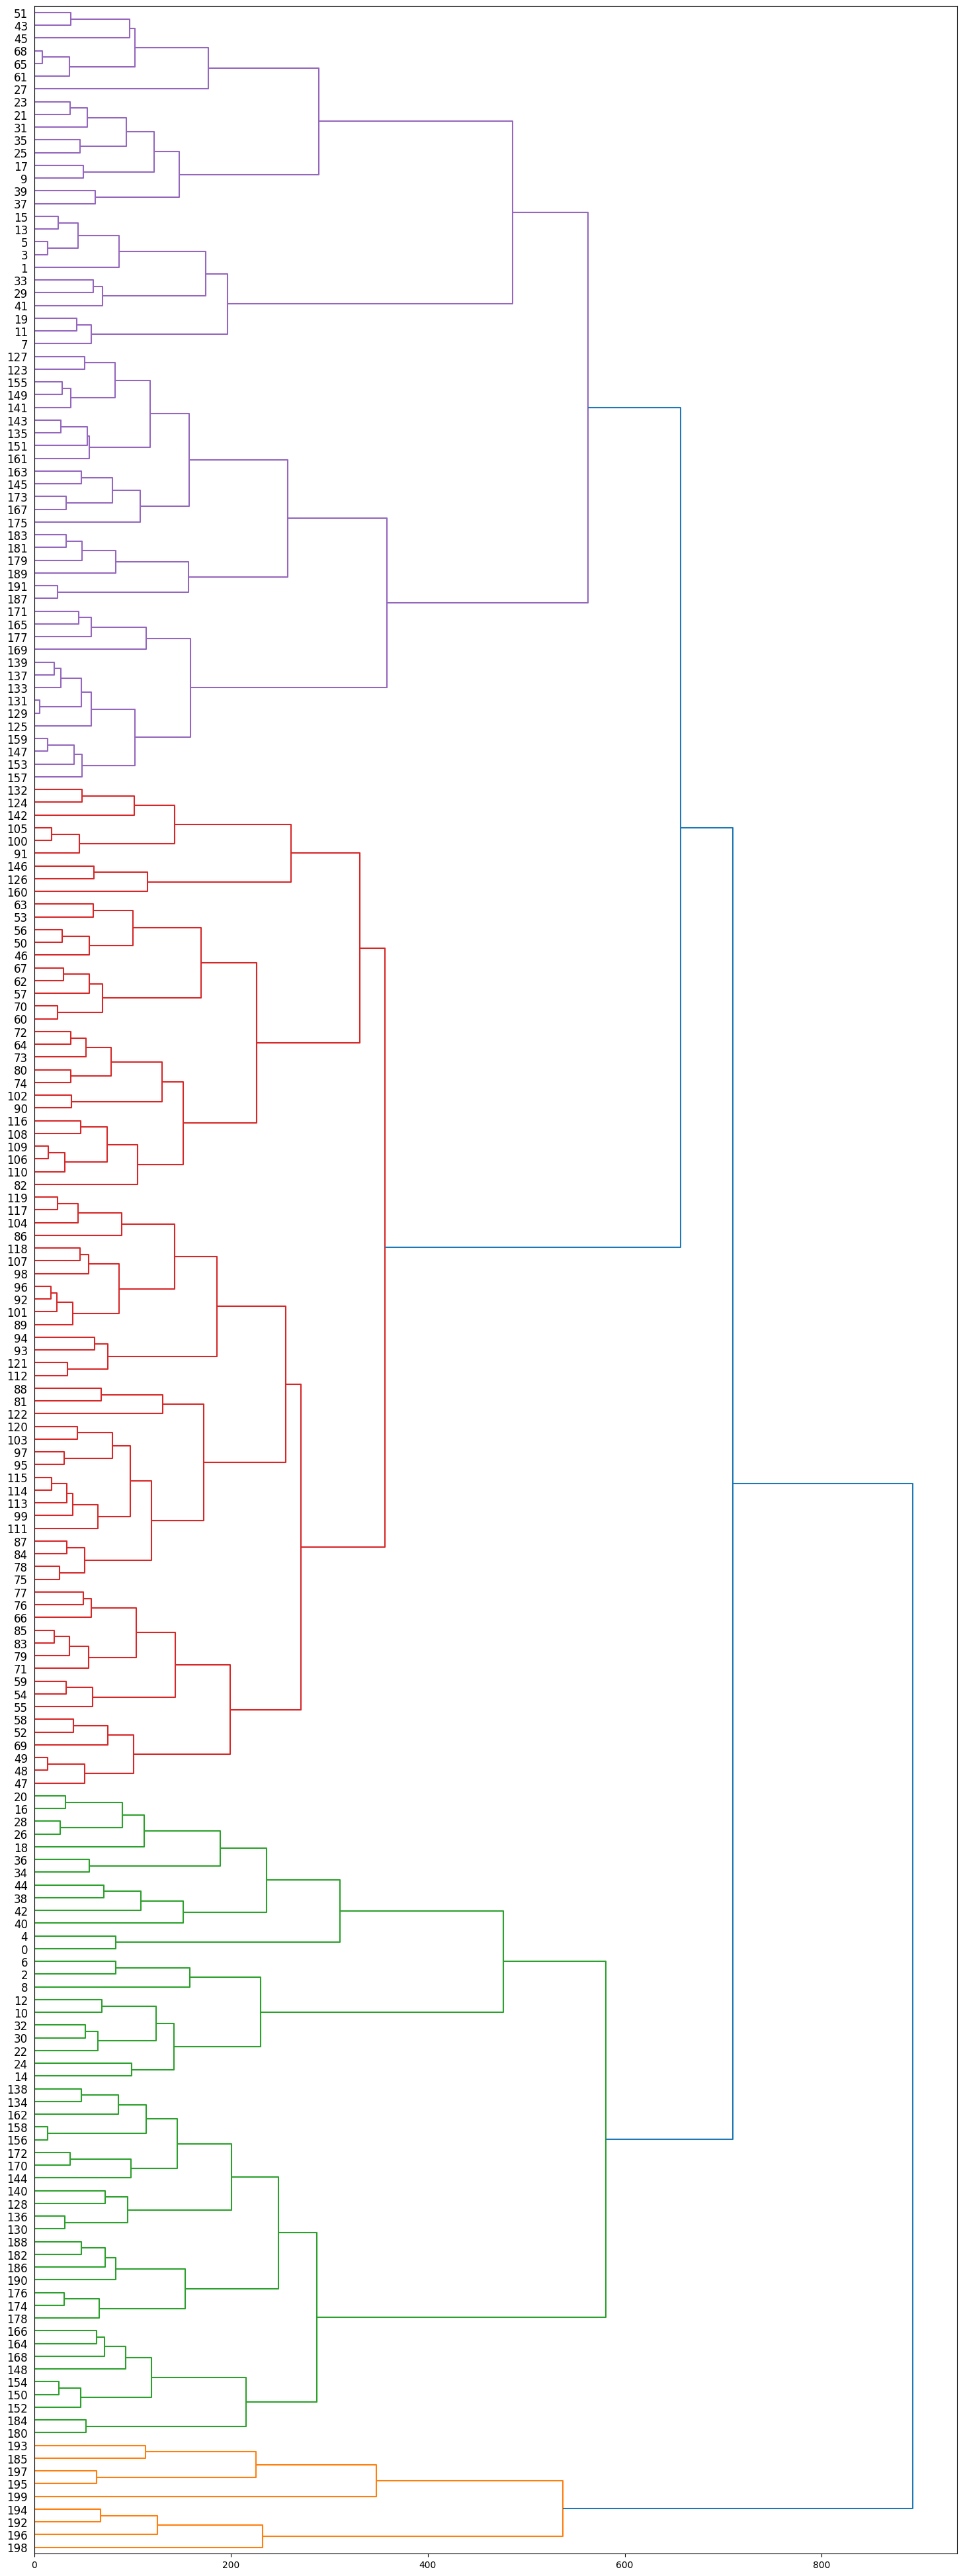

In [46]:
plt.figure(figsize=(18, 50))
dendro = hierarchy.dendrogram(Z, leaf_rotation=0, leaf_font_size=12, orientation='right')

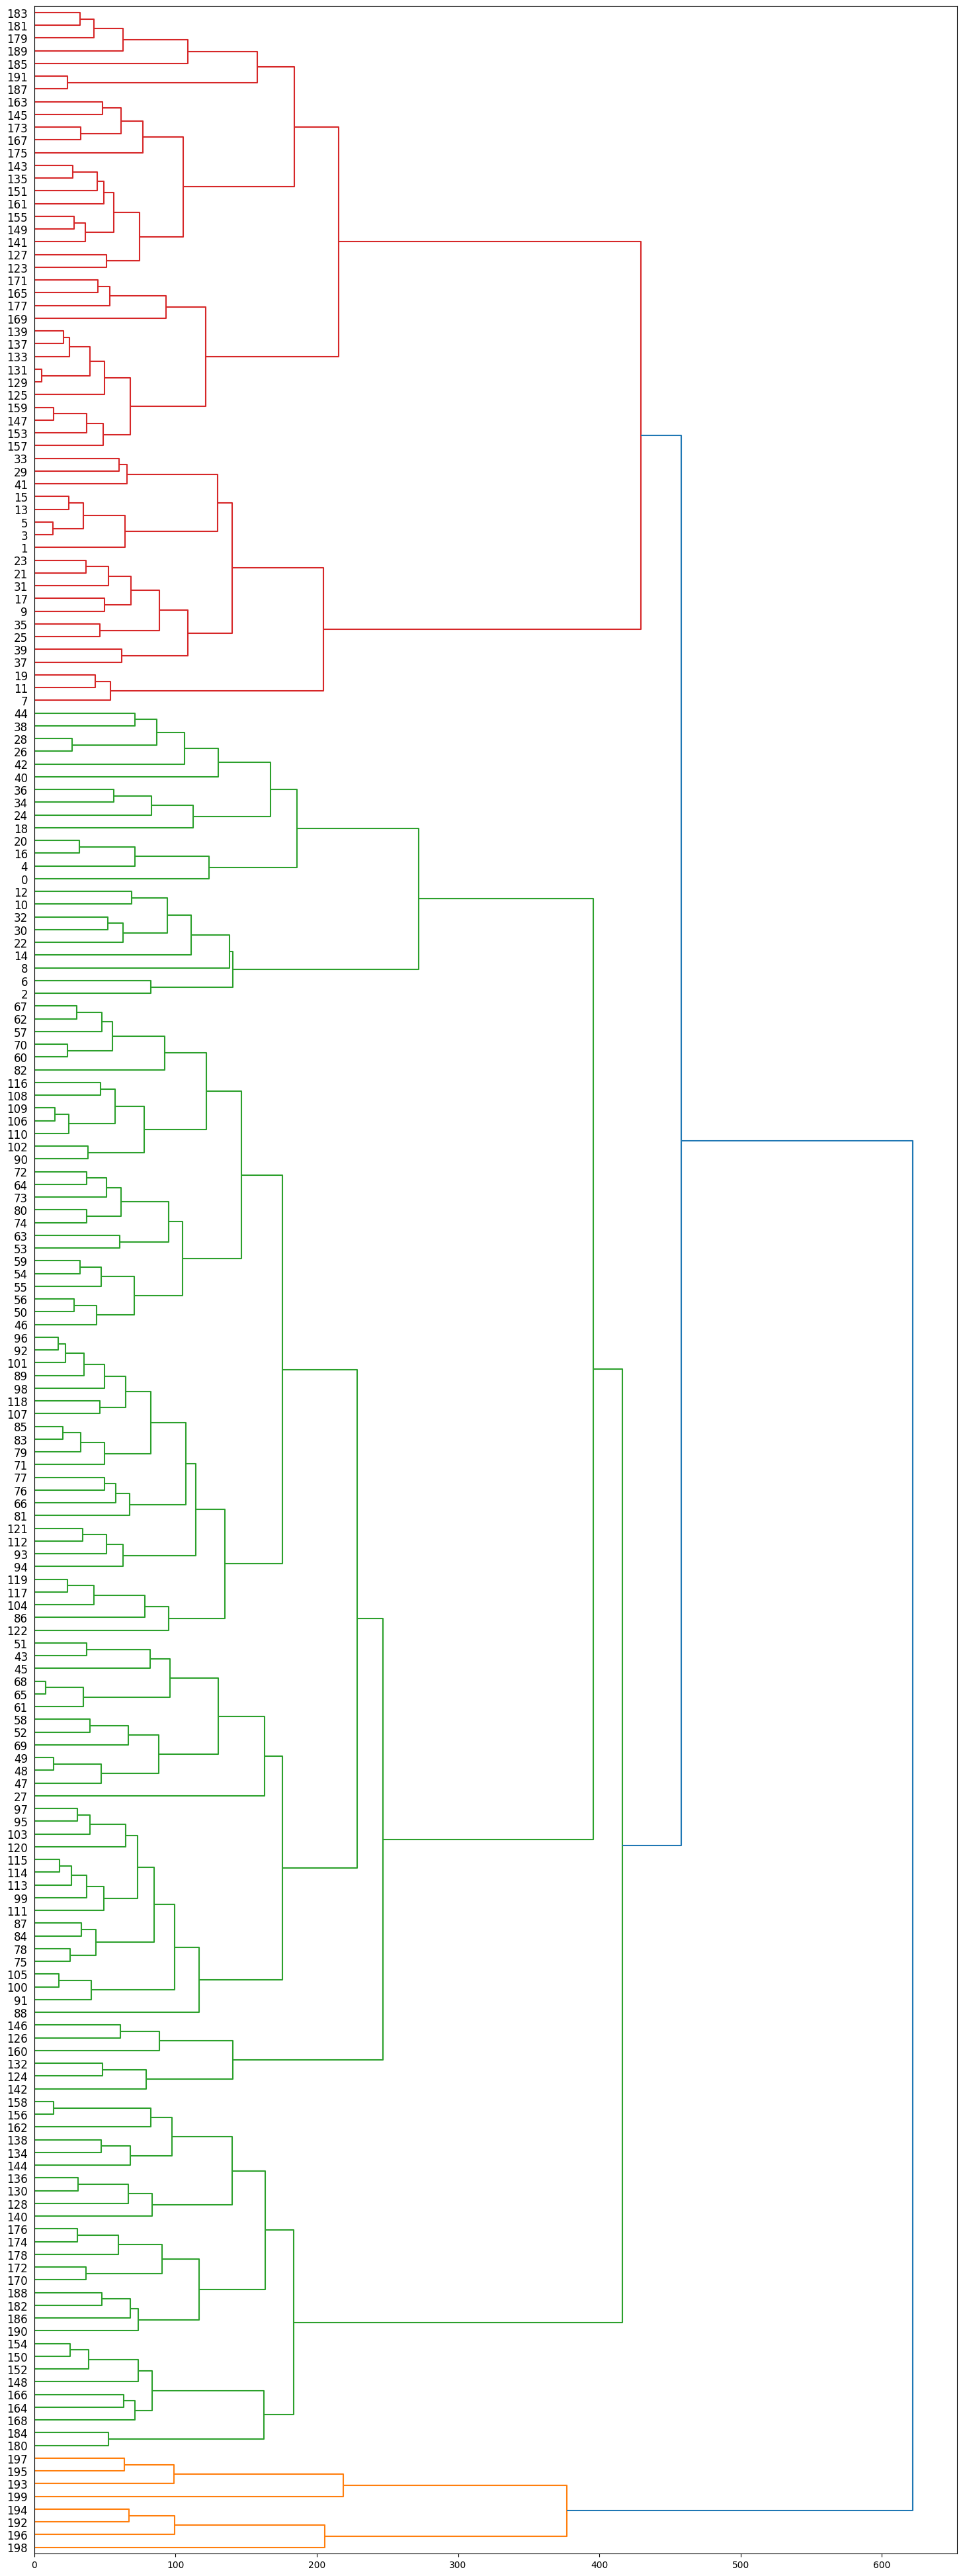

In [47]:
Z = hierarchy.linkage(dist, 'average')
plt.figure(figsize=(18, 50))
dendro = hierarchy.dendrogram(Z, leaf_rotation=0, leaf_font_size=12, orientation='right')

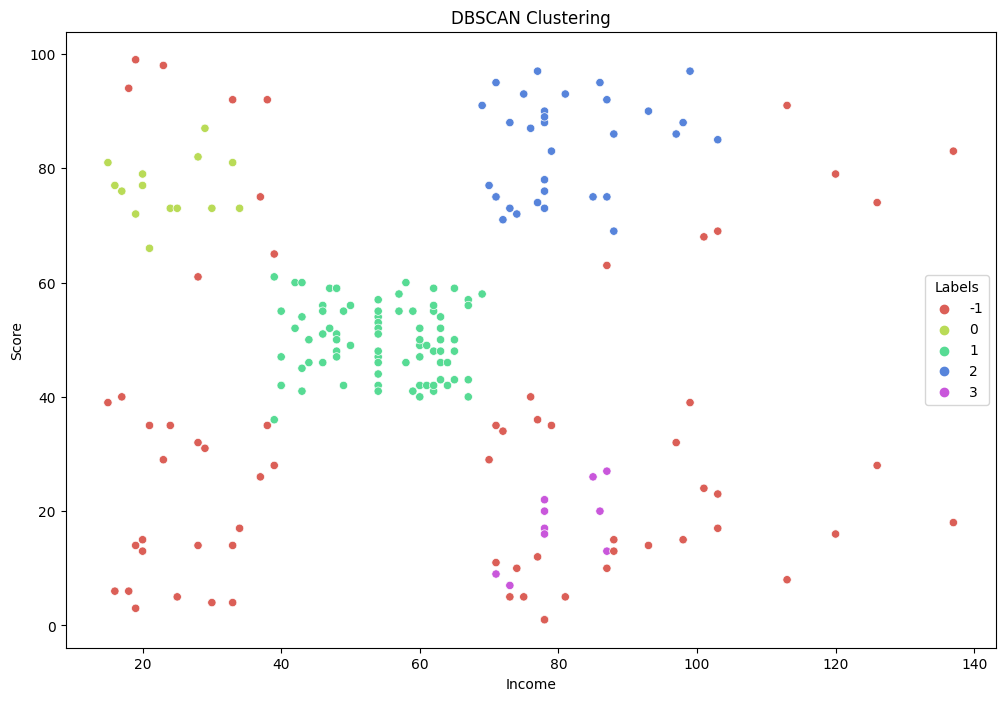

In [56]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=11, min_samples=6).fit(X)

X['Labels'] = db.labels_

plt.figure(figsize=(12, 8))
sns.scatterplot(x=X['Income'], y=X['Score'], hue=X['Labels'], 
                palette=sns.color_palette('hls', 5))

plt.title('DBSCAN Clustering')
plt.show()

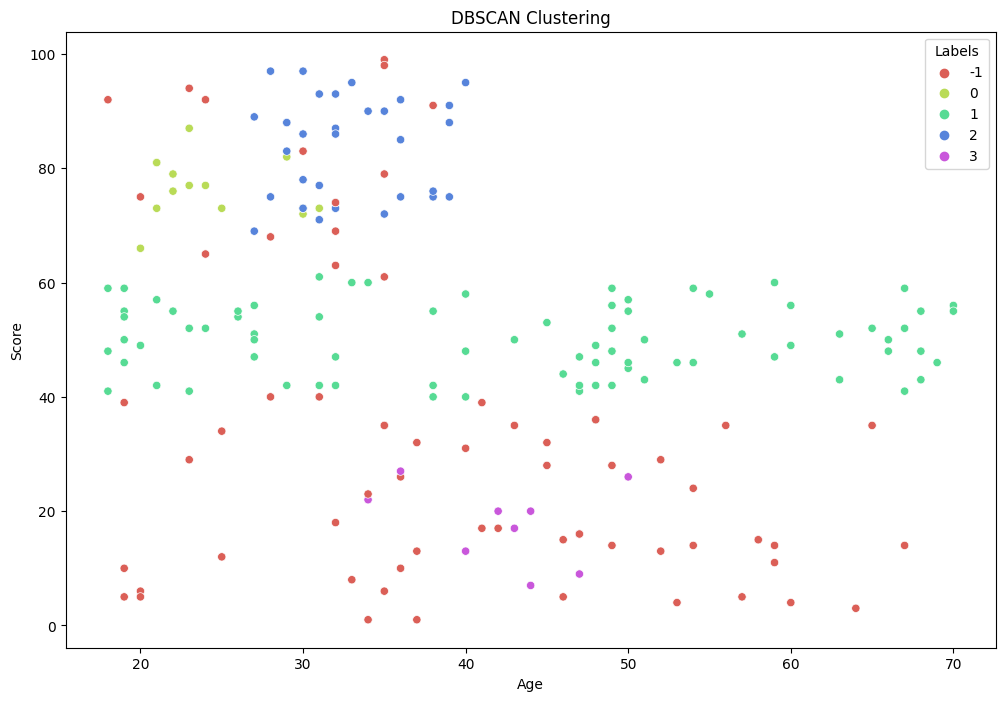

In [57]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x=X['Age'], y=X['Score'], hue=X['Labels'], 
                palette=sns.color_palette('hls', 5))

plt.title('DBSCAN Clustering')
plt.show()

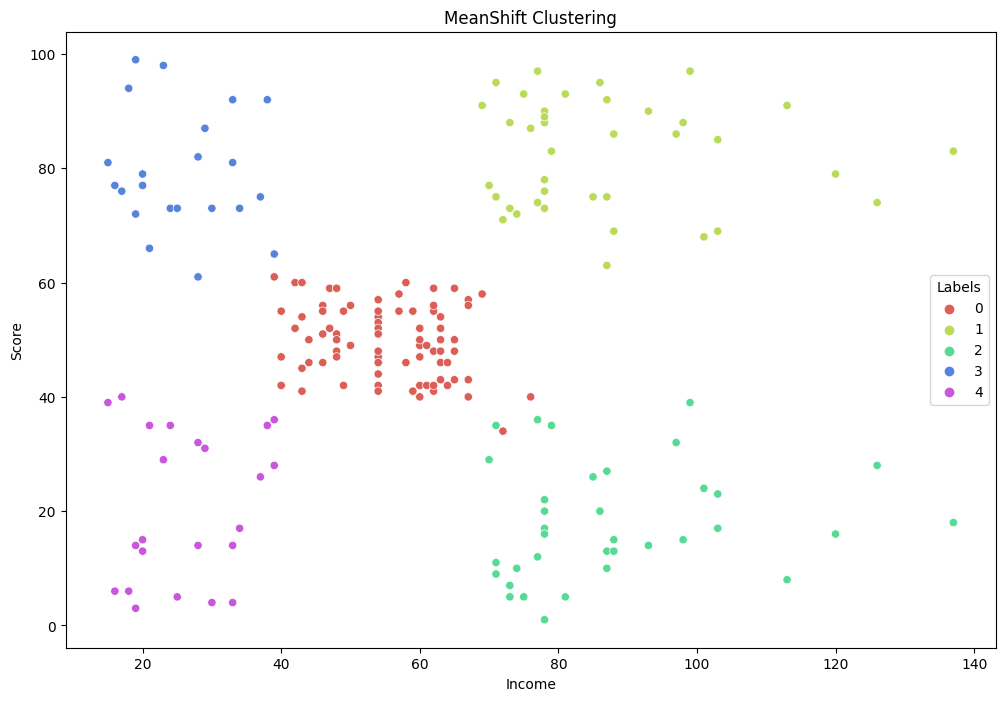

In [59]:
from sklearn.cluster import MeanShift, estimate_bandwidth

bandwidth = estimate_bandwidth(X, quantile=0.1)
ms = MeanShift(bandwidth=bandwidth).fit(X)

X['Labels'] = ms.labels_
plt.figure(figsize=(12, 8))
sns.scatterplot(x=X['Income'], y=X['Score'], hue=X['Labels'], 
                palette=sns.color_palette('hls', np.unique(ms.labels_).shape[0]))

plt.title('MeanShift Clustering')
plt.show()

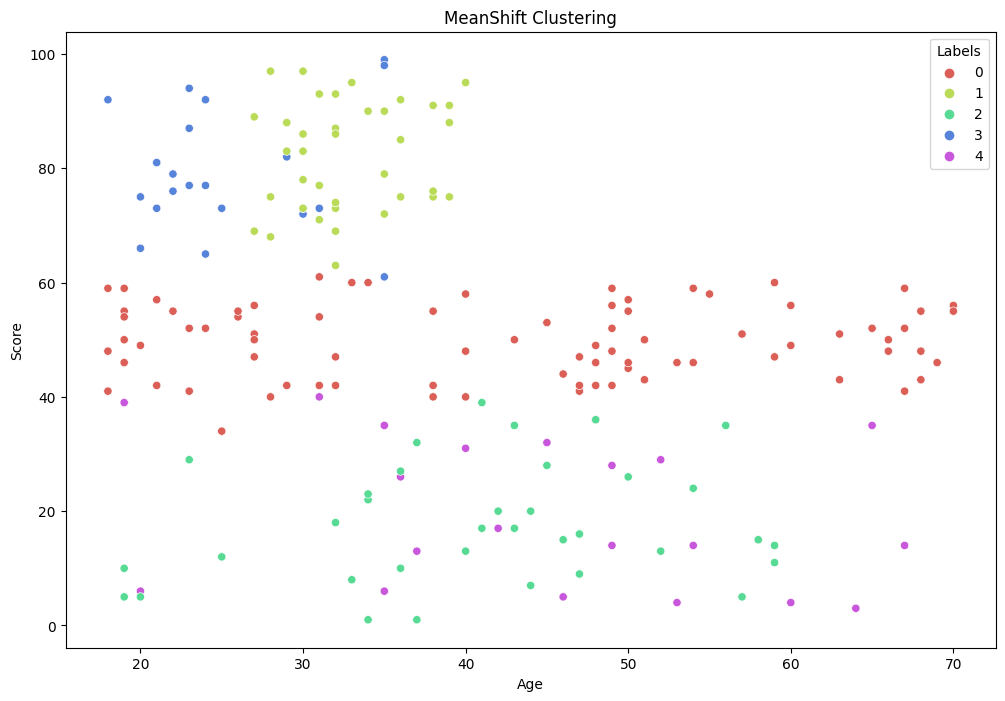

In [60]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x=X['Age'], y=X['Score'], hue=X['Labels'], 
                palette=sns.color_palette('hls', np.unique(ms.labels_).shape[0]))

plt.title('MeanShift Clustering')
plt.show()